In [12]:
# Importing all the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path

plt.style.use('dark_background')

In [13]:
base_path=Path.cwd().parent
csv_path=base_path/"data"/"processed"/"parameters.csv"
print(csv_path)

c:\Users\khadk\OneDrive\Desktop\phylogenetics\data\processed\parameters.csv


In [14]:
trees=pd.read_csv(csv_path)
trees.shape

(1000, 7)

In [15]:
trees.head()

,tree_id,lambda1,lambda2,mu,psi,t_1,n_tips
0,1,0.501304,2.336454,0.163378,0.663591,95.237383,385
1,2,0.554706,1.388490,0.098965,0.709463,44.541272,291
2,3,0.360680,1.360331,0.030785,0.815313,56.617984,257
3,4,0.665122,2.241307,0.102425,0.743478,22.061255,379
4,5,0.874817,3.417452,0.178526,0.879750,32.349473,138


In [16]:
trees.isnull().mean()*100

tree_id    0.0
lambda1    0.0
lambda2    0.0
mu         0.0
psi        0.0
t_1        0.0
n_tips     0.0
dtype: float64

In [17]:
trees.duplicated().sum()

np.int64(0)

In [18]:
trees.describe().T

,count,mean,std,min,25%,50%,75%,max
tree_id,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
lambda1,1000.0,0.648507,0.201997,0.301086,0.474209,0.653935,0.821635,0.999372
lambda2,1000.0,2.310956,0.930729,0.665461,1.574294,2.199057,2.955653,4.890533
mu,1000.0,0.148200,0.084021,0.018442,0.077921,0.133365,0.202455,0.387963
psi,1000.0,0.708806,0.114866,0.500430,0.608441,0.716217,0.808996,0.899927
t_1,1000.0,60.508431,23.281749,20.210716,41.467120,60.345568,80.605676,99.987671
n_tips,1000.0,241.447000,92.132913,80.000000,163.000000,242.000000,324.000000,400.000000


In [19]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tree_id  1000 non-null   int64  
 1   lambda1  1000 non-null   float64
 2   lambda2  1000 non-null   float64
 3   mu       1000 non-null   float64
 4   psi      1000 non-null   float64
 5   t_1      1000 non-null   float64
 6   n_tips   1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [20]:
def plot_kde(df:pd.DataFrame,cols:str):
    fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(12,6))
    axes=axes.flatten()
    for index,col in enumerate(cols):
        if index<len(axes):
            sns.kdeplot(df[col],fill=True,color='purple',ax=axes[index])
            axes[index].set_title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

In [21]:
num_cols=[col for col in trees.columns if col!='tree_id']
num_cols

['lambda1', 'lambda2', 'mu', 'psi', 't_1', 'n_tips']

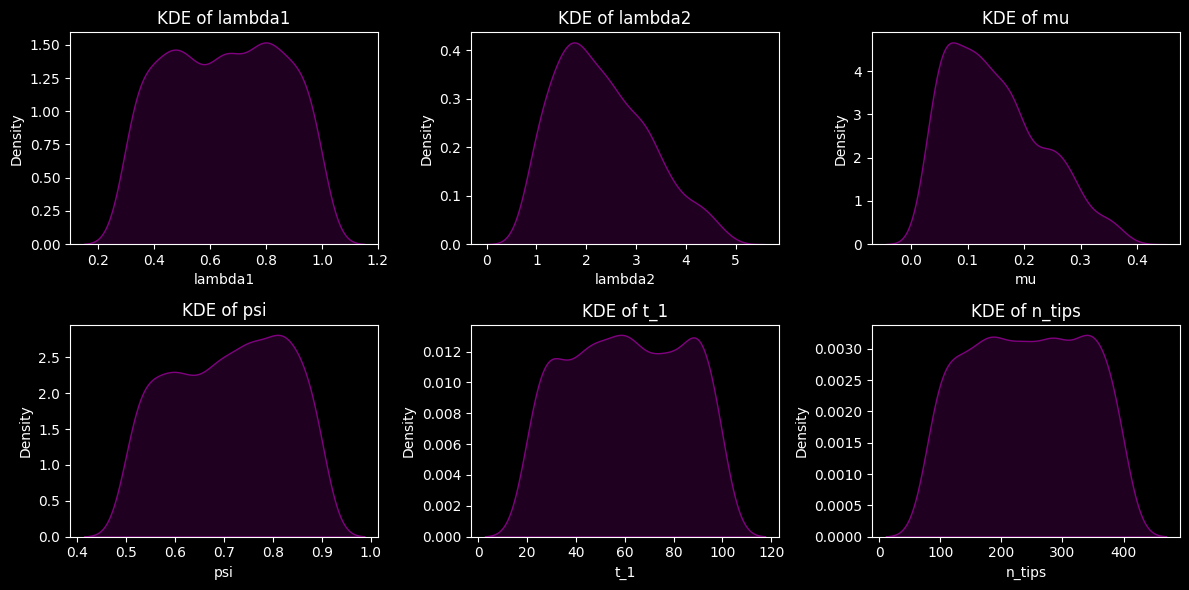

In [22]:
plot_kde(trees,num_cols)